# Oil Price Prediction

In [1]:
#!pip install google-colab

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pandas.plotting import lag_plot
import tensorflow as tf
from tensorflow.keras.optimizers import Optimizer


import warnings
warnings.filterwarnings('ignore')

In [4]:
#loaded the dataset
#df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/P4/Crude Oil Prices Daily.xlsx")

df = pd.read_excel('C:/Users/Asus/Documents/oil price prediction_pro1/crude_oil_price_daily.xlsx')
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


The dataset has 8,223 rows and 2 columns.

In [5]:
df.shape

(8223, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


df.info() function use to get an overview of the dataset. It tells us that the "Date" column is of type datetime64 and the "Closing Value" column is of type float64. We also see that there are 8,216 non-null values in the "Closing Value" column, indicating that there are some missing values.

In [7]:
df.describe()

,Date,Closing Value
count,8223,8216.000000
mean,2002-04-05 22:11:15.082086912,43.492139
min,1986-01-02 00:00:00,10.250000
25%,1994-01-25 12:00:00,19.577500
50%,2002-04-02 00:00:00,29.610000
75%,2010-06-12 12:00:00,63.402500
max,2018-07-09 00:00:00,145.310000
std,NaN,29.616804


In [8]:
df.nunique()

Date             8223
Closing Value    4611
dtype: int64

### Data cleaning
Data cleaning involves handling missing values in the dataset.

In [9]:
#treating missing values
df.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [10]:
df.isnull().any(axis=1).sum()

7

In [11]:
#dropping missing values
df = df.dropna()
df.isnull().sum()

Date             0
Closing Value    0
dtype: int64

### treating duplicate values

In [12]:
#checking for duplicates
df[df.duplicated()].shape

(0, 2)

In [13]:
#dropping duplicates
duplicate_shape = df.drop_duplicates(inplace=True)

In [14]:
df[df.duplicated()]

,Date,Closing Value


## Feature Engineering

#### setting date as date time index

In [15]:
df1 = df.copy()
df1 = df.set_index('Date')

In [16]:
df1.head()

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


#### seperating month and year to different columns

In [17]:
df["month"] = df.Date.dt.month # month extraction
df["year"] = df.Date.dt.year # year extraction
df.head(10)

,Date,Closing Value,month,year
0,1986-01-02,25.56,1,1986
1,1986-01-03,26.00,1,1986
2,1986-01-06,26.53,1,1986
3,1986-01-07,25.85,1,1986
4,1986-01-08,25.87,1,1986
5,1986-01-09,26.03,1,1986
6,1986-01-10,25.65,1,1986
7,1986-01-13,25.08,1,1986
8,1986-01-14,24.97,1,1986
9,1986-01-15,25.18,1,1986


## Data visualisation

### Line Plot

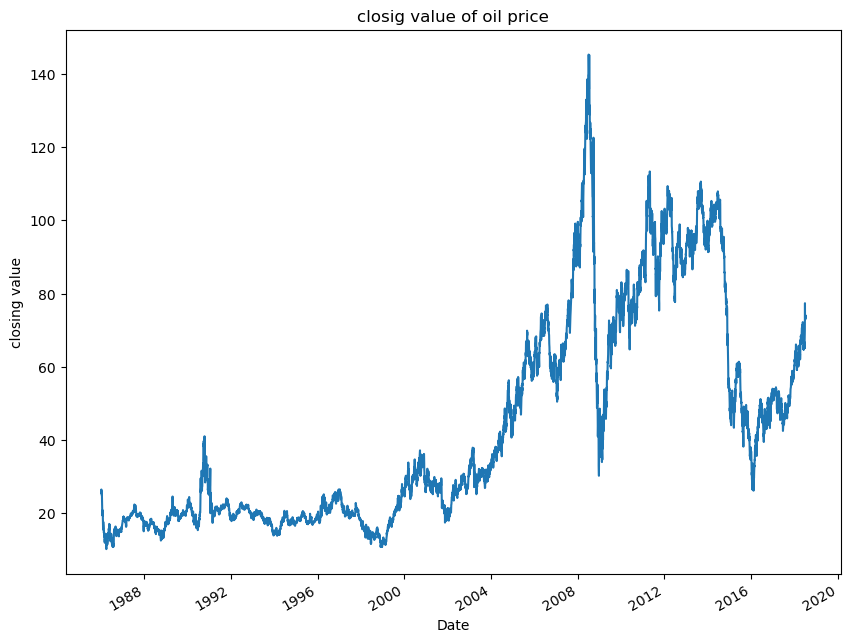

In [18]:
# Plot the line plot
df1['Closing Value'].plot(figsize=(10,8) , title='closig value of oil price')
plt.xlabel('Date')
plt.ylabel('closing value')
plt.show()

#### We use line plot to visualize the trend of crude oil prices over time.
This line plot will demonstrate the overall trend of the logarithmic closing values throughout the given time period.


### Distplot

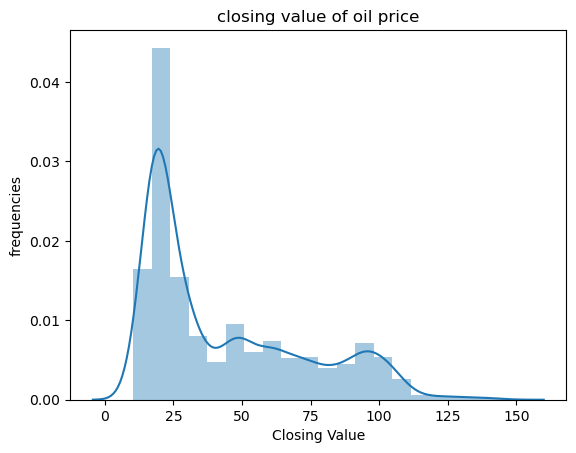

In [19]:
# Plot the distplot
sns.distplot(df['Closing Value'] , bins=20 )
plt.title('closing value of oil price')
plt.xlabel('Closing Value')
plt.ylabel('frequencies')
plt.show()

This will generate a kernel frequencies estimate plot along with a histogram,
providing insights into the distribution of the closing values.

In [20]:
# Applying log transformation to the "Closing Value" column
df['closing_value_log'] = np.log1p(df['Closing Value'])

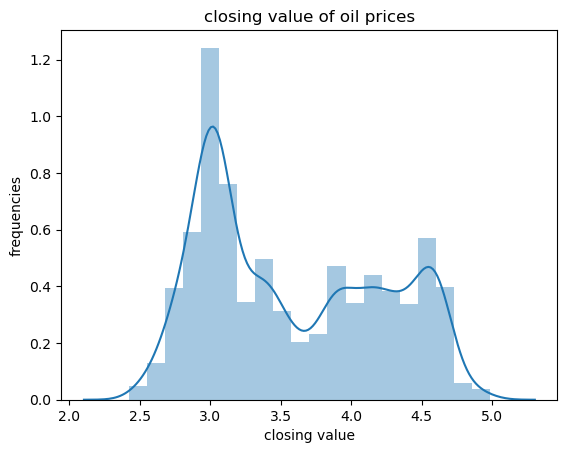

In [21]:
# distplot after applying log
sns.distplot(df['closing_value_log'] , bins=20)
plt.xlabel('closing value')
plt.ylabel('frequencies')
plt.title('closing value of oil prices')
plt.show()

### Taking averages of every month

<Axes: xlabel='month', ylabel='year'>

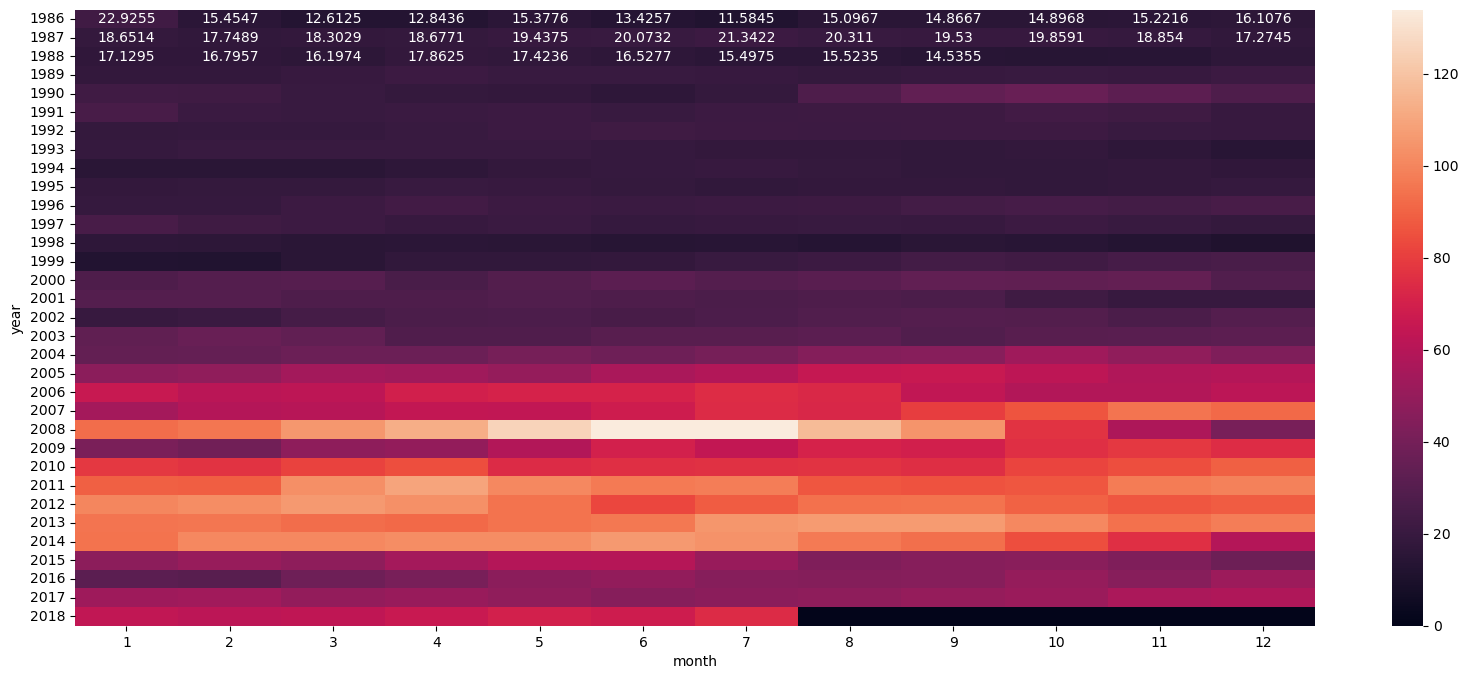

In [22]:
#Plot the heatmap
plt.figure(figsize=(20,8))
heatmap_ymonth = pd.pivot_table(data=df,values='Closing Value',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_ymonth,annot=True,fmt='g')

### Boxplot between target feature and year and month

This box plot will provide insights into the distribution, median, quartiles, and potential outliers
of the logarithmic closing values for each year.

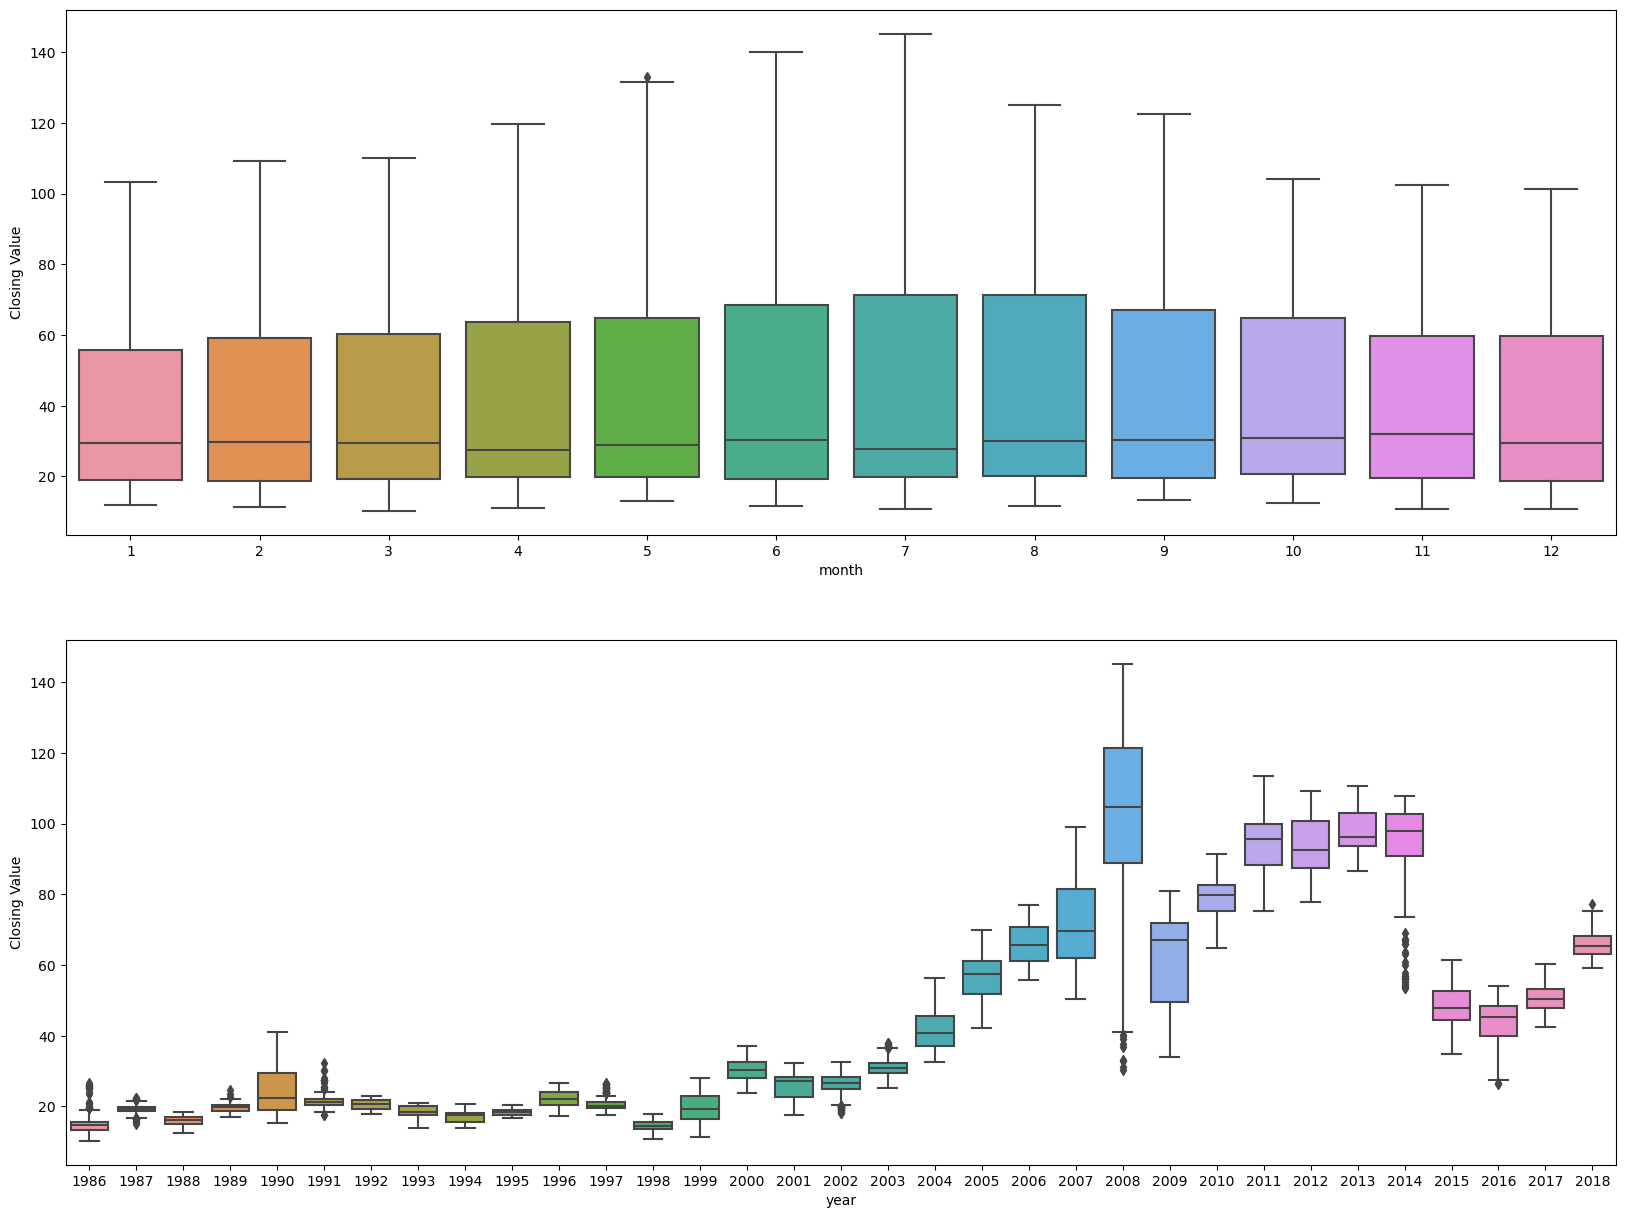

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(211)
sns.boxplot(x='month',y='Closing Value',data=df)
plt.subplot(212)
sns.boxplot(x='year' , y='Closing Value',data=df)
plt.show()

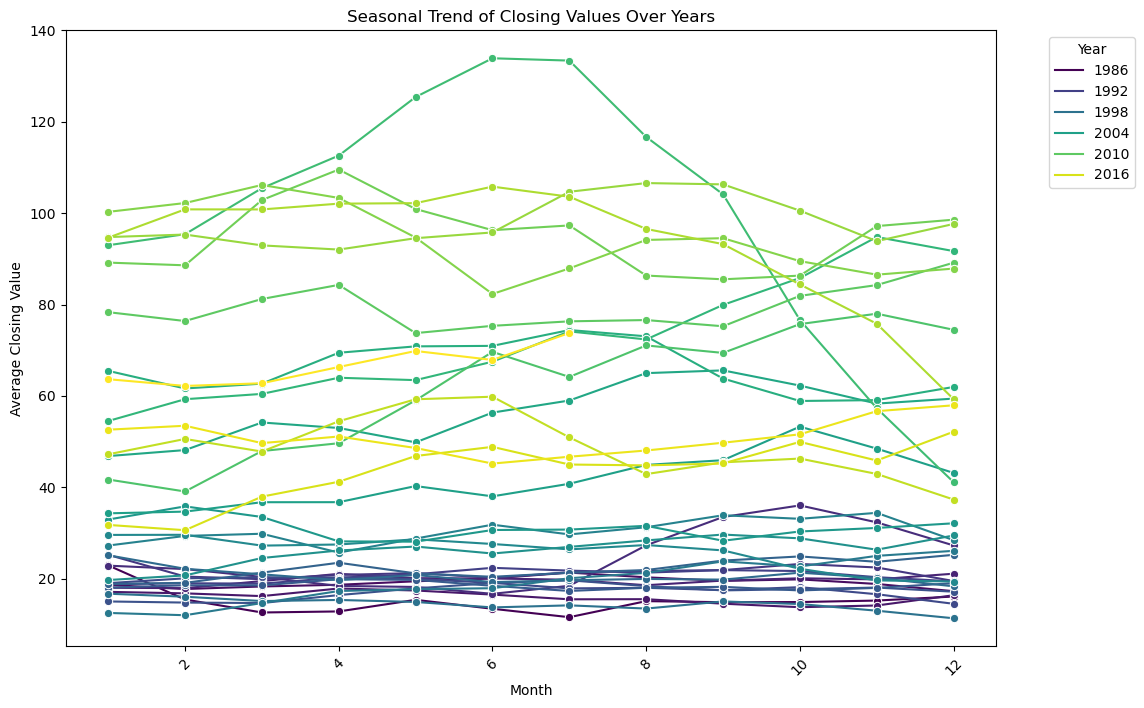

In [24]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x="month", y="Closing Value", hue="year", data=df, ci=None, marker="o", palette="viridis", sort=False)
plt.xlabel("Month")
plt.ylabel("Average Closing Value")
plt.title("Seasonal Trend of Closing Values Over Years")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()



-The x-axis represents the months, and the y-axis represents the average closing value of oil prices.

-The plot includes multiple lines, each representing a different year.

-The color of each line is determined by the year variable in the DataFrame.

-we can identify any recurring trends, such as higher or lower average closing values during certain months.This plot helps us understand the seasonality of oil prices and how it has varied over time.

## Treating outliers
To handle outliers, we use the Interquartile Range (IQR) method, which involves calculating the upper and
lower bounds and removing any data points that fall outside these bounds.

In [25]:
q1 = df['Closing Value'].quantile(0.25)
q3 = df['Closing Value'].quantile(0.75)
iqr = q3 - q1

In [26]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit , upper_limit

(-46.16, 129.14)

<Axes: >

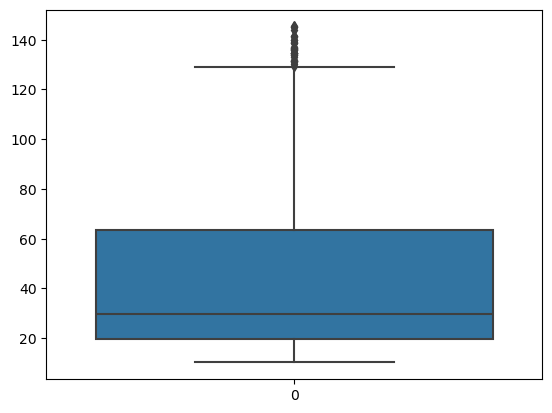

In [27]:
sns.boxplot(df['Closing Value'])

as we can see their are some data points that fall outside these bounds.

In [28]:
#finding outlier
df.loc[(df['Closing Value'] > upper_limit) | (df['Closing Value'] < lower_limit)]

,Date,Closing Value,month,year,closing_value_log
5648,2008-05-21,132.99,5,2008,4.897765
5649,2008-05-22,130.04,5,2008,4.875503
5650,2008-05-23,131.58,5,2008,4.887186
5652,2008-05-28,131.00,5,2008,4.882802
5659,2008-06-06,138.51,6,2008,4.938136
5660,2008-06-09,134.44,6,2008,4.908529
5661,2008-06-10,131.38,6,2008,4.885677
5662,2008-06-11,136.43,6,2008,4.923115
5663,2008-06-12,136.91,6,2008,4.926601
5664,2008-06-13,134.84,6,2008,4.911478


In [29]:
#trimming data
new_df = df.loc[(df['Closing Value'] < upper_limit) & (df['Closing Value'] > lower_limit)]

#### Capping
Capping involves setting a limit on extreme values to prevent them from affecting the analysis.

In [30]:
#capping
new_df = df.copy()
new_df.loc[(new_df['Closing Value']>upper_limit) , 'Closing Value'] = upper_limit
new_df.loc[(new_df['Closing Value']<lower_limit) , 'Closing Value'] = lower_limit

<Axes: >

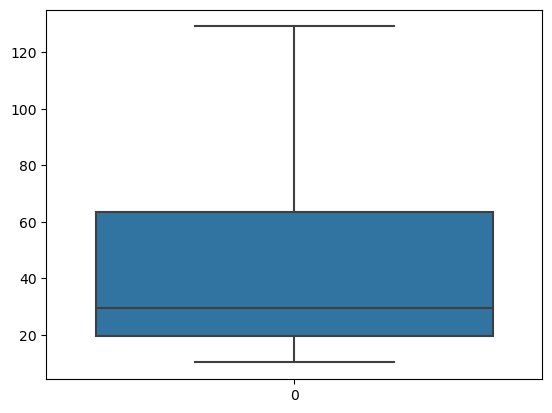

In [31]:
sns.boxplot(new_df['Closing Value'])

now all the data points which falls outside the bound are removed.

In [32]:
df['year'] = pd.to_numeric(df['year'] , errors='coerce')

### Scatter Plot:
A scatter plot is a graph that displays the relationship between two variables, with each data point represented as a dot. To analyze the oil prices over the years, we can create a scatter plot where the x-axis represents the Month, the y-axis represents the closing value, and each data point is color-coded based on the year it belongs to.

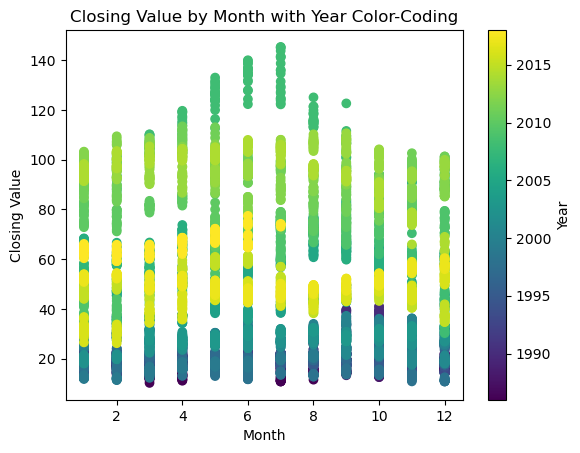

In [33]:
# Plot the scatter plot with color-coding for different years
plt.scatter(df["month"], df["Closing Value"], c=df["year"], cmap="viridis")
plt.xlabel("Month")
plt.ylabel("Closing Value")
plt.title("Closing Value by Month with Year Color-Coding")
plt.colorbar(label="Year")
plt.show()

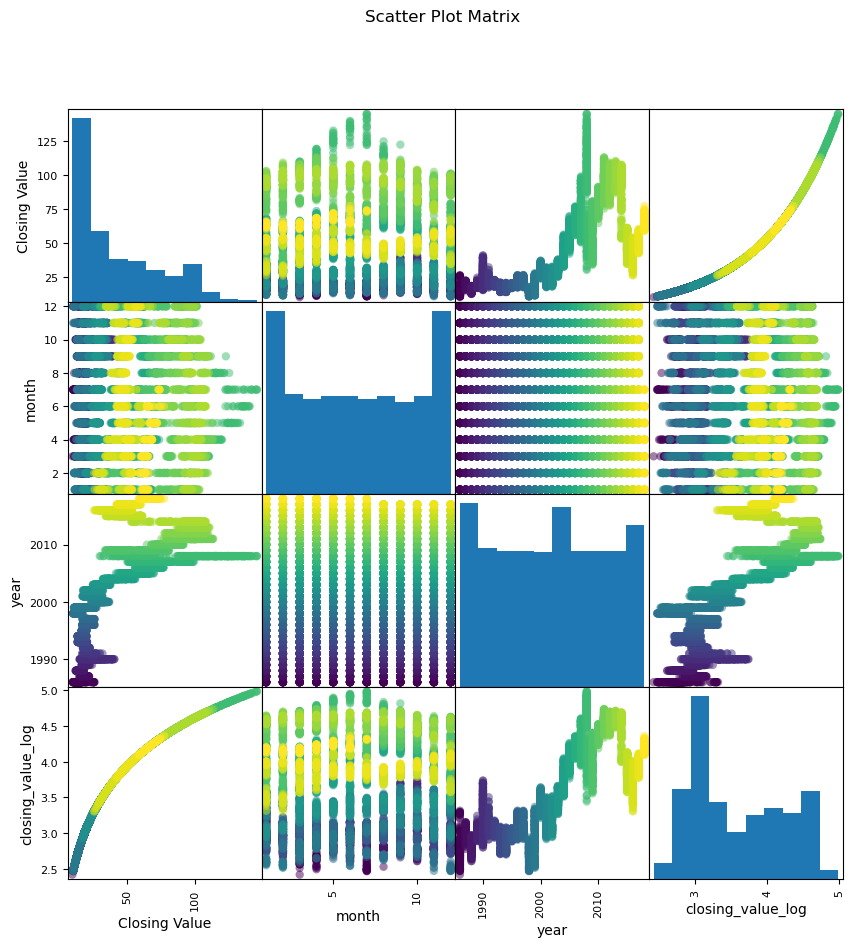

In [34]:
# Scatter plot matrix
pd.plotting.scatter_matrix(df, figsize=(10, 10), marker="o", c=df["year"], cmap="viridis")
plt.suptitle("Scatter Plot Matrix")
plt.show()

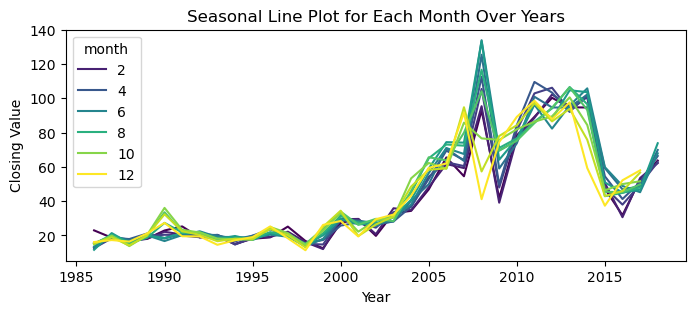

In [35]:
# Line Plot for each month over years
plt.figure(figsize=(8, 3))
sns.lineplot(x='year', y='Closing Value', hue='month', data=df, palette='viridis', ci=None)
plt.title('Seasonal Line Plot for Each Month Over Years')
plt.xlabel('Year')
plt.ylabel('Closing Value')
plt.show()


-By plotting the closing value of oil prices on the y-axis and the year on the x-axis, we can observe how the prices vary for each month over time.

-The different lines in the plot represent each month, and the color scheme helps differentiate between the months.

-The plot allows us to identify any recurring patterns or trends in oil prices for each month.

### Normalization:
Normalization is the process of scaling the data to a standard range, typically between 0 and 1.

This technique ensures that variables with different scales are comparable.

In [36]:
# normalsing data
from sklearn.preprocessing import StandardScaler

In [37]:
std_scaler = StandardScaler()
df['Closing Value'] = std_scaler.fit_transform(np.array(df['Closing Value']).reshape(-1, 1))

### Correlation Coefficient

In [38]:
# Calculate the correlation between 'Closing Value' and 'Year'
correlation = df['Closing Value'].corr(df['year'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.7552824892918216


In [39]:
# Calculate the correlation between 'Closing Value' and 'Month'
correlation = df['Closing Value'].corr(df['month'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.010001555037194673


The correlation coefficient measures the strength and direction of the linear relationship between two variables. It not provide meaningful correlation results.

### Correlation Matrix

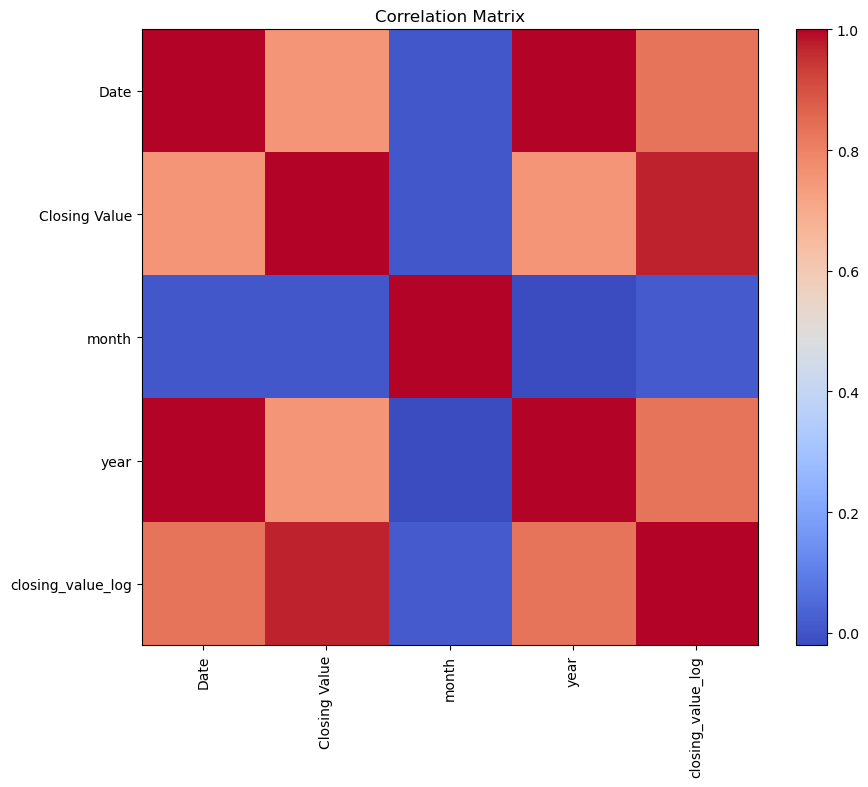

In [40]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

A correlation matrix is a tabular representation of the correlation coefficients between multiple variables. It provides a comprehensive overview of the relationships between variables.

### Lag plot
A lag plot can help us identify any autocorrelation in the data.

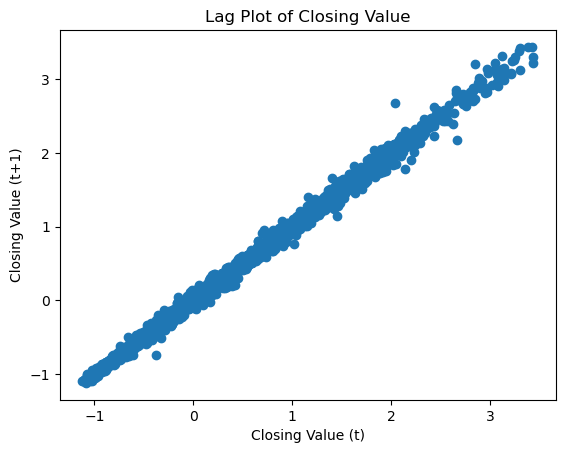

In [41]:
#lagplot to analyse autocorrelation between the values
lag_plot(df['Closing Value'])
plt.title('Lag Plot of Closing Value')
plt.xlabel('Closing Value (t)')
plt.ylabel('Closing Value (t+1)')
plt.show()


there is a positive autocorrelation in closing value

### Violin Plot:
A violin plot combines a box plot and a kernel density plot to show the distribution of a variable.

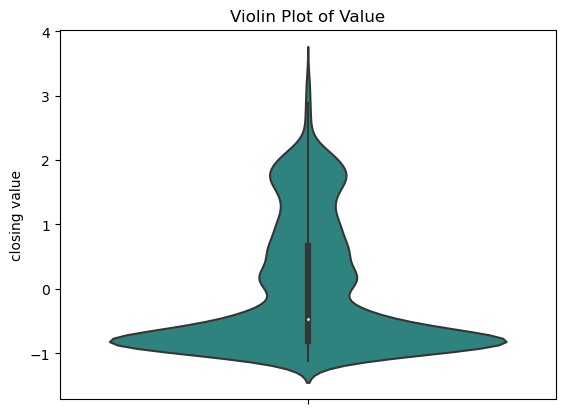

In [42]:
#violine plot to anaylse density of datapoints
sns.violinplot(y='Closing Value', data=df, palette='viridis')
plt.title('Violin Plot of Value')
plt.ylabel('closing value')
plt.show()

the shape is symmetric suggesting a relatively normal distribution

### ACF plots

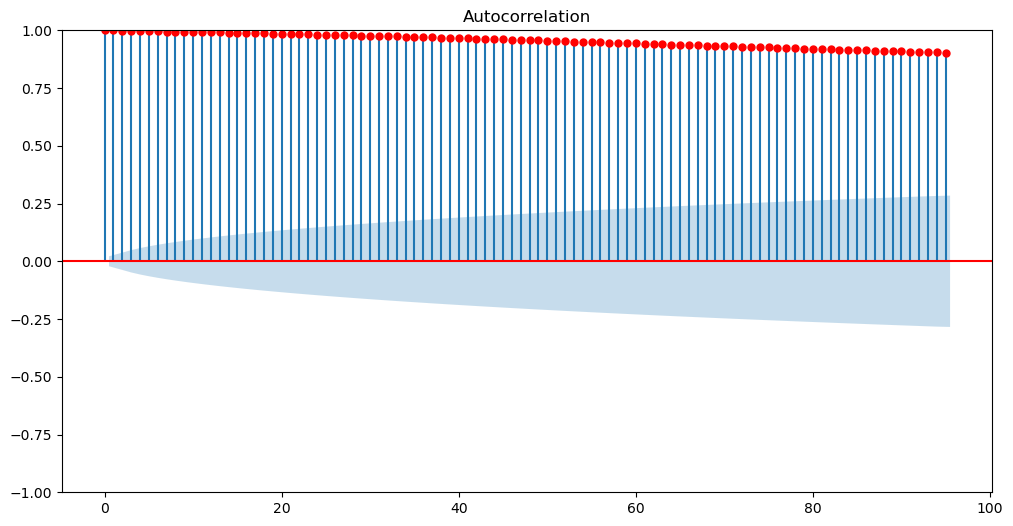

In [43]:
import statsmodels.graphics.tsaplots as tsa_plots
acf_color = 'red'
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    tsa_plots.plot_acf(df['Closing Value'],lags=95, color=acf_color)
    plt.show()

To summarize, autocorrelation is the correlation between a time series (signal) and a delayed version of itself, while the ACF plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation¶

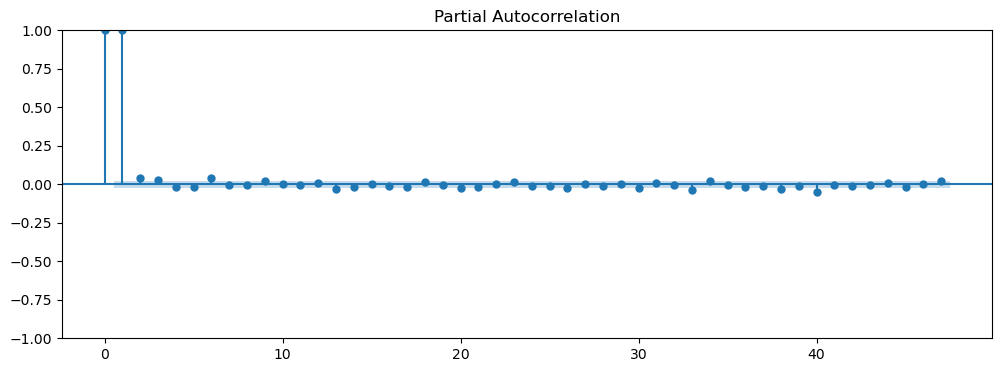

In [44]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_pacf(df['Closing Value'],lags=47)
    plt.show()

To summarize, a partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.

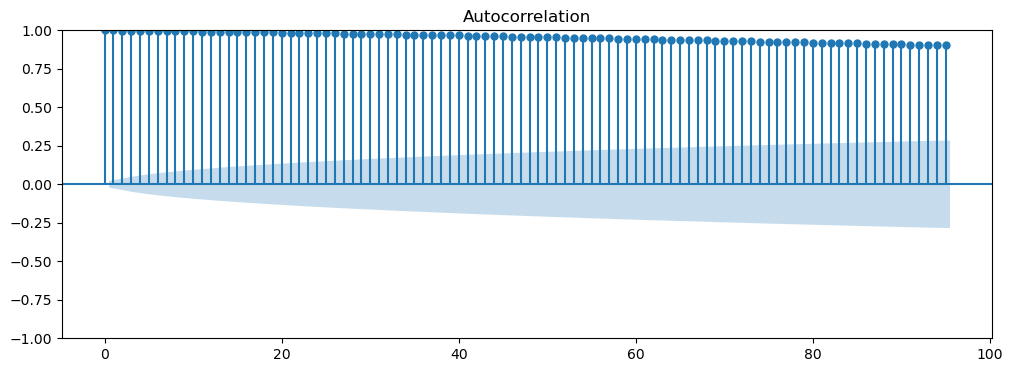

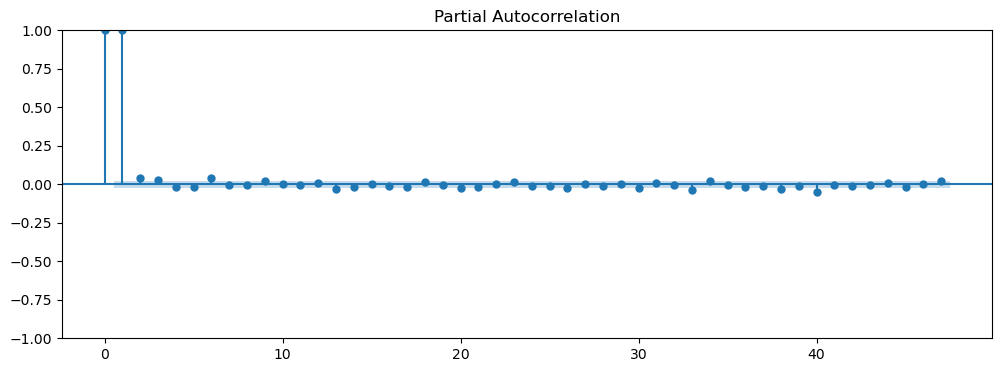

In [45]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df['Closing Value'],lags=95)
    tsa_plots.plot_pacf(df['Closing Value'],lags=47)
    plt.show()

### Seasonal Decomposition, Addictive Decomposition and Multiplicative Decompsotion
We can use the seasonal_decompose() function from statsmodels to decompose the time series data into its trend, seasonal, and residual components.
Additive and multiplicative decompositions are time series analysis techniques used to understand the different components of a time series data, such as trend, seasonality, and residual. By decomposing the oil price time series data into these components, we can gain insights into the underlying patterns and fluctuations in the prices.

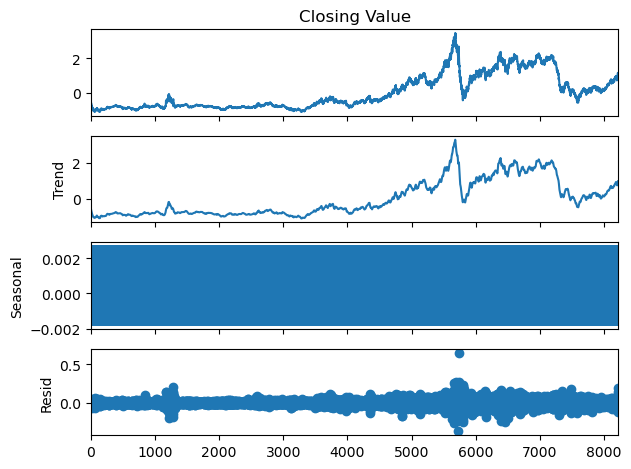

In [46]:
result = seasonal_decompose(df["Closing Value"], model='additive', period=12)
result.plot()
plt.show()


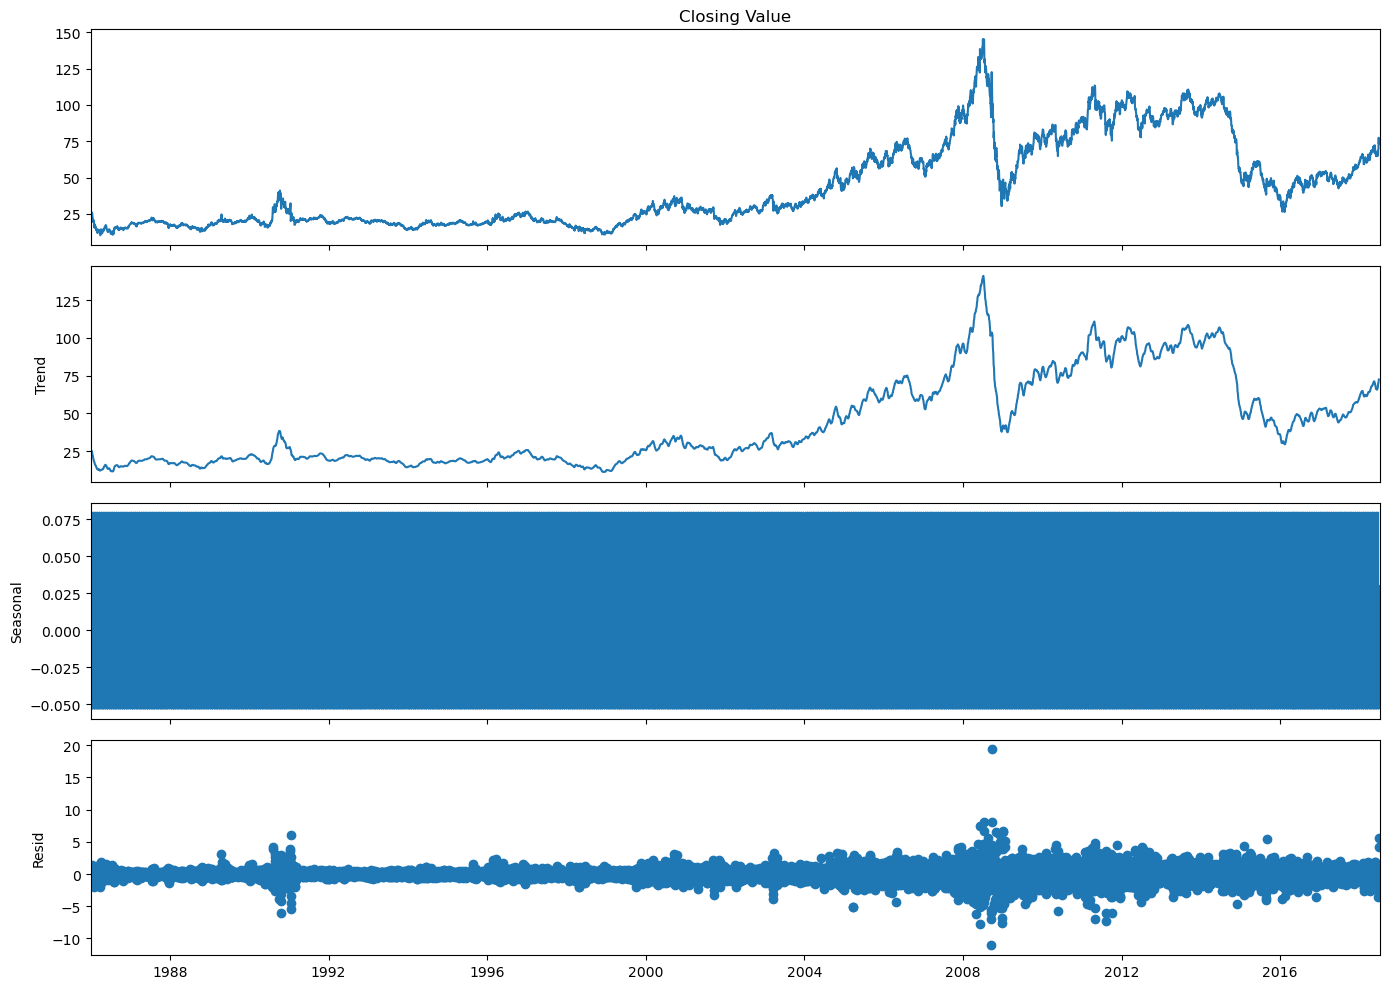

In [47]:
# Addictive Decomposition
decompose_ts_add = seasonal_decompose(df1['Closing Value'],period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

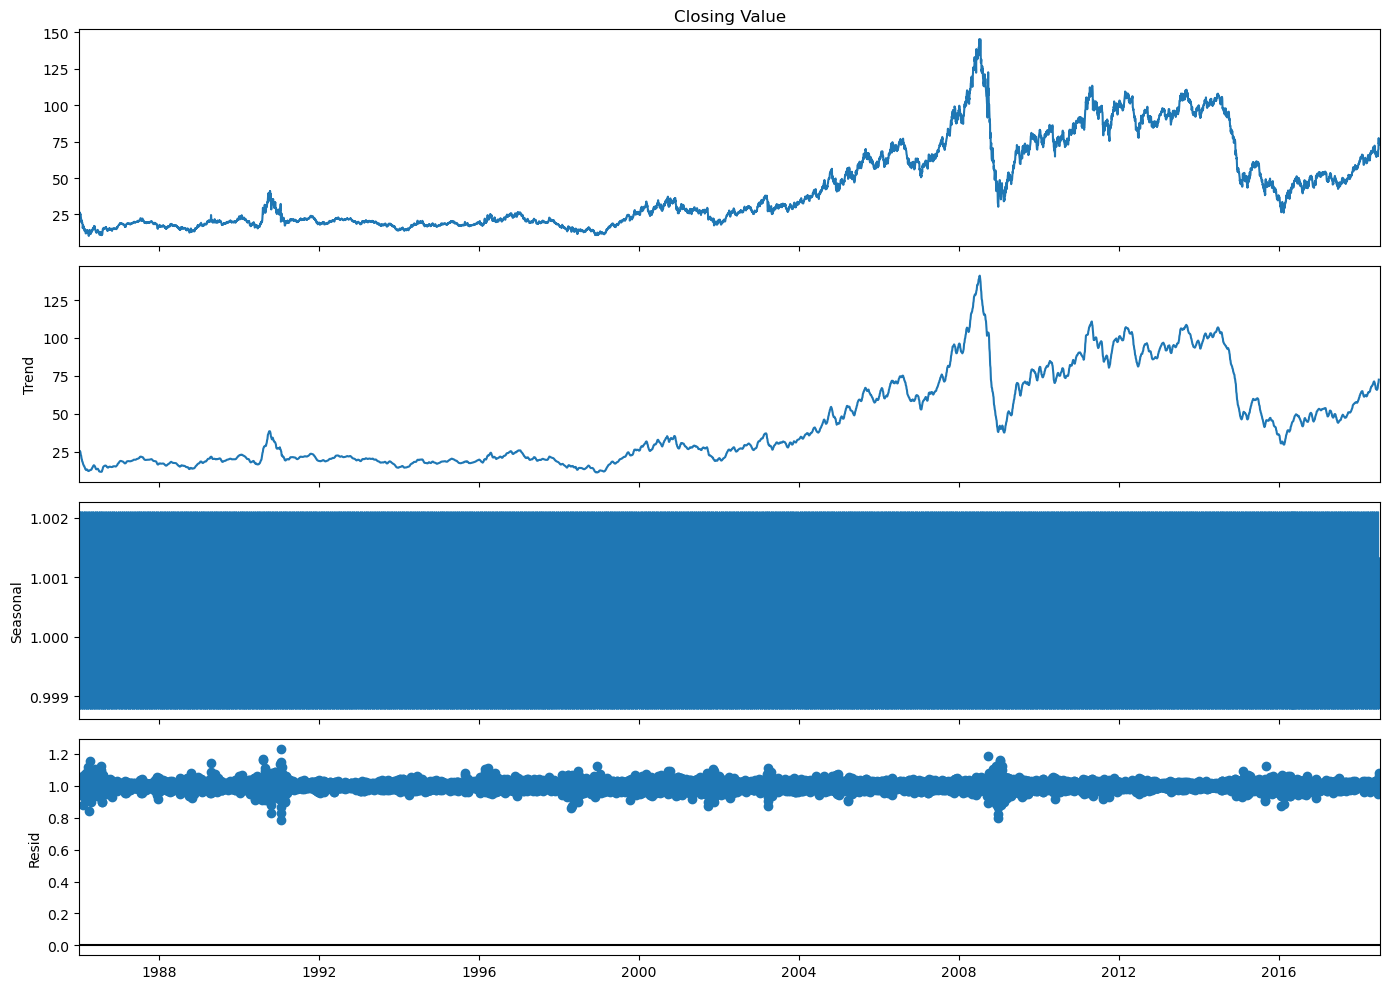

In [48]:
# Multiplicative Decompsotion
decompose_ts_add = seasonal_decompose(df1['Closing Value'],period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

# Dickey-Fuller Test

Dickey Fuller test used to check the stationarity of time series data.

<Axes: >

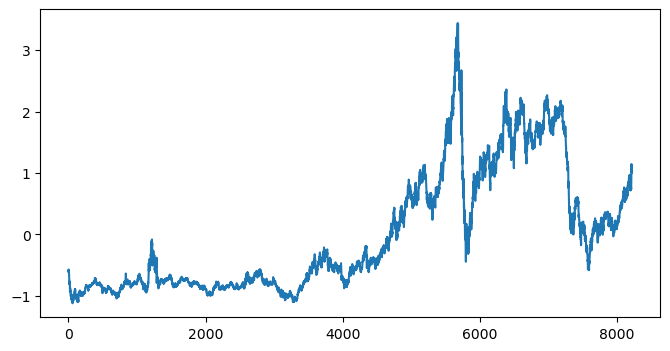

In [49]:
y = df['Closing Value']
plt.figure(figsize=(8,4))
y.plot()

* we can see the mean is not constant
* the trend is increasing year by year

##### to make it stationary will adapt the dickey_fuller test

In [50]:
y

0      -0.605509
1      -0.590651
2      -0.572755
3      -0.595716
4      -0.595041
          ...   
8217    1.026435
8218    1.036565
8220    0.998071
8221    1.022720
8222    1.027785
Name: Closing Value, Length: 8216, dtype: float64

In [51]:
# importing the library
from statsmodels.tsa.stattools import adfuller

In [52]:
#will use transformations to normalise
y1 = y-y.shift(1)
y1 = y1[1:]  # ignoring 1st value as it is null value
y2 = np.log(y1-np.min(y1)+1)  # using log to ignore negative values

In [53]:
y2

1       0.414262
2       0.416268
3       0.388953
4       0.404846
5       0.407994
          ...   
8217    0.398972
8218    0.411133
8220    0.378369
8221    0.420712
8222    0.407770
Name: Closing Value, Length: 8215, dtype: float64

#### null-hypothesis => series is not stationary

#### alternative-hypothesis => series is stationary

In [54]:
result = adfuller(y)

In [55]:
print(f'test_statistic: {result[0]}')
print(f'p:value: {result[1]}')
print(f'critical value: {result[4]}')

if result[1] > 0.05:
    print('series is not stationary')
else:
    print('series is stationary')

test_statistic: -2.012552949417375
p:value: 0.2810963363373499
critical value: {'1%': -3.4311498720674725, '5%': -2.8618934872009274, '10%': -2.5669581564542083}
series is not stationary


# KPSS Test

The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is another test to check for stationarity in a time series.

#### null-hypothesis => series is stationary
#### alternate-hypothesis => series is not stationary

In [56]:
#importing library
from statsmodels.tsa.stattools import kpss

In [57]:
stats , p , lags , critical_value = kpss(df['Closing Value'] , 'ct')

In [58]:
print(f'Test Statistic: {stats}')
print(f'p-value: {p}')
print(f'critical value: {critical_value}')

if p < 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistic: 1.0189317887086489
p-value: 0.01
critical value: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


In [59]:
#pip install pmdarima

In [60]:
#using differencing methodology( d parameter of arima)
import pmdarima as pm
pm.arima.ndiffs(df['Closing Value'] , alpha=0.05 , test='kpss' , max_d=4)

1

First Order Differencing : y't = yt - yt-1

<Axes: >

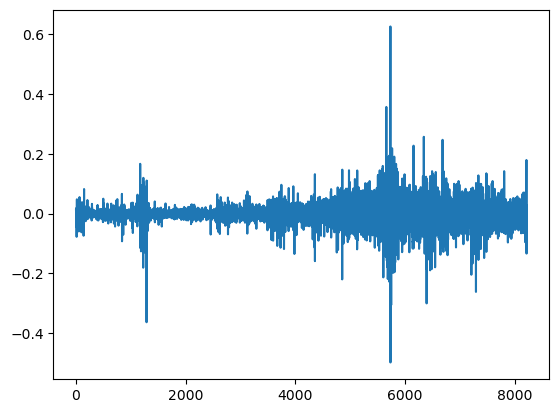

In [61]:
lag_goog = df['Closing Value'].rolling(window=2).apply(lambda x : x.iloc[1] - x.iloc[0]).dropna()
lag_goog.plot()

rolling = It means that for each point in the time series, it considers the current value and the previous value

lambda function = It calculates the difference between the second (current) element and the first (previous) element within the window.

###### previously we see values are centerd aroud 0 , but lets just recheck it

In [62]:
pm.arima.ndiffs(lag_goog , alpha=0.05 , test='kpss' , max_d=4)

0

we see there is no need of differencing again

#### Standardization is a process of transforming data to have a mean of 0 and a standard deviation of 1.
##### lets again check for stationarity

In [63]:
result = adfuller(lag_goog)

print(f'test_statistic: {result[0]}')
print(f'p:value: {result[1]}')
print(f'critical value: {result[4]}')

if result[1] > 0.05:
    print('series is not stationary')
else:
    print('series is stationary')

test_statistic: -12.782227155778282
p:value: 7.373609664419911e-24
critical value: {'1%': -3.4311498720674725, '5%': -2.8618934872009274, '10%': -2.5669581564542083}
series is stationary


now we can see that the series is stationary

In [64]:
df['Closing Value'].fillna(df['Closing Value'].mean(), inplace=True)

fillna method to replace the missing values with the mean of the column:

## Model Building

### Split the dataset into training and testing sets.

We will use the first 80% of the data for training and the remaining 20% for testing:

In [65]:
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

### Simple Moving Average (SMA) Model:

In [66]:
def simple_moving_average(data, window):
    return data['Closing Value'].rolling(window=window).mean()

In [67]:
window = 30  # Adjust the window size as needed
train_data['SMA'] = simple_moving_average(train_data, window)
test_data['SMA'] = simple_moving_average(test_data, window)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Remove NaN values from test_data
test_data = test_data.dropna()

sma_mae = mean_absolute_error(test_data['Closing Value'], test_data['SMA'])
sma_mse = mean_squared_error(test_data['Closing Value'], test_data['SMA'])
sma_rmse = np.sqrt(sma_mse)

print("SMA Model Evaluation:")
print("MAE:", sma_mae)
print("MSE:", sma_mse)
print("RMSE:", sma_rmse)

SMA Model Evaluation:
MAE: 0.1032564436290974
MSE: 0.017034561283297046
RMSE: 0.130516517281519


- An MAE of 0.1032 suggests that, on average, the model's predictions are off by approximately 0.1032 units.
- An MSE of 0.0170 indicates the average squared difference between predicted and actual values.
- An RMSE of 0.1305 provides the average magnitude of the errors.

### Autoregressive Integrated Moving Average (ARIMA) Model:

In [69]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the Autoregressive Integrated Moving Average (ARIMA) Model:
model = ARIMA(train_data['Closing Value'], order=(3, 1, 2))  # Adjust the order as needed
arima_model = model.fit()

In [70]:
# Make predictions
predictions = arima_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

In [71]:
# Assign predictions to 'ARIMA' column in test_data
test_data['ARIMA'] = predictions

In [72]:
# Remove NaN values from test_data
test_data = test_data.dropna()
arima_mae = mean_absolute_error(test_data['Closing Value'], test_data['ARIMA'])
arima_mse = mean_squared_error(test_data['Closing Value'], test_data['ARIMA'])
arima_rmse = np.sqrt(arima_mse)

print("ARIMA Model Evaluation:")
print("MAE:", arima_mae)
print("MSE:", arima_mse)
print("RMSE:", arima_rmse)

ARIMA Model Evaluation:
MAE: 1.0634898982181493
MSE: 1.721601172290239
RMSE: 1.3120980040721955


- an MAE of 1.0635 suggests that, on average, the model's predictions are off by approximately 1.0635 units.
- An MSE of 1.7216 indicates the average squared difference between the predicted and actual values.
- An RMSE of 1.3121 gives the average magnitude of the errors.

### Support Vector Regression (SVR) Model:

In [73]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_data[['Closing Value']])
scaled_test = scaler.transform(test_data[['Closing Value']])

In [74]:
# Fit the Support Vector Regression (SVR) Model:
model = SVR(kernel='rbf')  # Adjust the kernel as needed
model.fit(scaled_train, train_data['Closing Value'])

SVR()

In [75]:
# Make predictions
predictions = model.predict(scaled_test)

In [76]:
# Assign predictions to 'Support Vector' column in test_data
test_data['SVR'] = predictions

In [77]:
svr_mae = mean_absolute_error(test_data['Closing Value'], test_data['SVR'])
svr_mse = mean_squared_error(test_data['Closing Value'], test_data['SVR'])
svr_rmse = np.sqrt(svr_mse)

print("SVR Model Evaluation:")
print("MAE:", svr_mae)
print("MSE:", svr_mse)
print("RMSE:", svr_rmse)

SVR Model Evaluation:
MAE: 0.07800847076158343
MSE: 0.006662530490226276
RMSE: 0.08162432535847555


- An MAE of 0.0780 suggests that, on average, the model's predictions are off by approximately 0.0780 units.
- An MSE of 0.0067 indicates the average squared difference between predicted and actual values.
- An RMSE of 0.0816 provides the average magnitude of the errors.

### Random Forest Regression Model:

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Remove NaN values from train_data and test_data
train_data = train_data.dropna()
test_data = test_data.dropna()

In [79]:
# Fit the Random Forest model
model = RandomForestRegressor()
model.fit(train_data[['Date']], train_data['Closing Value'])

RandomForestRegressor()

In [80]:
# Make predictions
predictions = model.predict(test_data[['Date']])

In [81]:
# Reset the index of test_data
test_data = test_data.reset_index(drop=True)

In [82]:
# Assign predictions to 'Random Forest' column in test_data
test_data['Random Forest'] = predictions

In [83]:
rf_mae = mean_absolute_error(test_data['Closing Value'], test_data['Random Forest'])
rf_mse = mean_squared_error(test_data['Closing Value'], test_data['Random Forest'])
rf_rmse = np.sqrt(rf_mse)

print("Random Forest Model Evaluation:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)

Random Forest Model Evaluation:
MAE: 1.062375889376716
MSE: 1.7184574668154318
RMSE: 1.3108994876860056


- An MAE of 1.0637 suggests that, on average, the model's predictions are off by approximately 1.0637 units.
- An MSE of 1.7222 indicates the average squared difference between predicted and actual values.
- An RMSE of 1.3123 provides the average magnitude of the errors.

###  Linear regression model:

In [84]:
from sklearn.linear_model import LinearRegression

# Remove NaN values from train_data and test_data
train_data = train_data.dropna()
test_data = test_data.dropna()

In [85]:
# Convert 'Date' column to ordinal values
train_data['Date'] = train_data['Date'].map(lambda date: date.toordinal())
test_data['Date'] = test_data['Date'].map(lambda date: date.toordinal())

In [86]:
# Fit the Linear Regression model
model = LinearRegression()
model.fit(train_data[['Date']], train_data['Closing Value'])

LinearRegression()

In [87]:
# Make predictions
predictions = model.predict(test_data[['Date']])

In [88]:
# Reset the index of test_data
test_data = test_data.reset_index(drop=True)

In [89]:
# Assign predictions to 'Linear Regression' column in test_data
test_data['Linear Regression'] = predictions

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate predictions using the linear regression model
predictions = model.predict(test_data[['Date']])

In [91]:
# Calculate evaluation metrics
mae = mean_absolute_error(test_data['Closing Value'], predictions)
mse = mean_squared_error(test_data['Closing Value'], predictions)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Linear Regression Model Evaluation:
MAE: 0.9749341745909786
MSE: 1.1220080975630635
RMSE: 1.059248836470007


- An MAE of 0.9749 suggests that, on average, the model's predictions are off by approximately 0.9749 units.
- An MSE of 1.1220 indicates the average squared difference between predicted and actual values.
- An RMSE of 1.0592 provides the average magnitude of the errors.

Mean Absolute Error (MAE):

- MAE measures the average absolute difference between predicted and actual values.
- Smaller MAE values indicate better performance.

Mean Squared Error (MSE):

- MSE measures the average squared difference between predicted and actual values.
- Smaller MSE values indicate better performance.

Root Mean Squared Error (RMSE):

- RMSE is the square root of the MSE, providing a measure of the average magnitude of the errors.
- Smaller RMSE values indicate better performance.

### Inference

- SMA: It has relatively low errors, but it's a simple model that may not capture complex patterns.

- ARIMA: It has higher errors compared to other models.

- SVR: It shows low errors and seems to perform well.

- Random Forest: It has errors similar to ARIMA but may capture non-linear patterns better.

- Linear Regression: It performs reasonably well, with errors comparable to other models.

the model with the lowest error metrics as the suitable one for our task.


### SARIMA Model

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Splitting the dataset into training and testing sets
train_data = df['Closing Value'][:-30]
test_data = df['Closing Value'][-30:]

In [93]:
# Fitting the SARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

In [94]:
# Forecasting
forecast = model_fit.get_forecast(steps=30)
predicted_values = forecast.predicted_mean

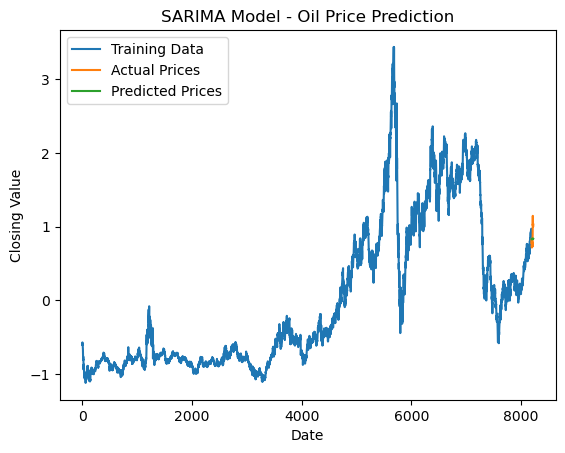

In [95]:
# Plotting the results
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Prices')
plt.plot(test_data.index, predicted_values, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.title('SARIMA Model - Oil Price Prediction')
plt.legend()
plt.show()

### Holt-Winter model

In [96]:
# Import the necessary libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and testing sets
train_data = df['Closing Value'][:-100]
test_data = df['Closing Value'][-100:]

In [97]:
# Build the Holt-Winters model
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12).fit()

In [98]:
# Generate predictions
predictions = model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

In [99]:
# Evaluate the model
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

In [100]:
# Calculate the accuracy metrics
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

In [101]:
# Print the accuracy metrics
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Absolute Percentage Error (MAPE): ", mape)

Root Mean Squared Error (RMSE):  0.24793331312243294
Mean Absolute Error (MAE):  0.20954095084264923
Mean Absolute Percentage Error (MAPE):  23.396238672477594


In [102]:
holt_winter_accuracy = 1 - (mae / np.mean(df['Closing Value']))

In [103]:
print("Holt winter accuracy: ", holt_winter_accuracy)
holt_winter_accuracy

Holt winter accuracy:  1081660869345344.1


1081660869345344.1

In [104]:
# Convert accuracy to percentage
holt_winter_accuracy_percentage = holt_winter_accuracy * 100
print("Holt winter accuracy % : ", holt_winter_accuracy_percentage)

Holt winter accuracy % :  1.0816608693453442e+17


### FP profit model

In [105]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [106]:
# Splitting the data into train and test sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train_data, test_data = df[:train_size], df[train_size:]

In [107]:
# FP profit model
fp_profit_model = ExponentialSmoothing(train_data['Closing Value'], seasonal='add', seasonal_periods=12).fit()
fp_profit_predictions = fp_profit_model.forecast(test_size)
fp_profit_error = test_data['Closing Value'] - fp_profit_predictions

In [108]:
# Model evaluation and error value calculation
fp_profit_mae = np.mean(np.abs(fp_profit_error))

In [109]:
# Accuracy calculation
fp_profit_accuracy = 1 - (fp_profit_mae / np.mean(df['Closing Value']))

In [110]:
print("Mean Absolute Error (MAE): ", fp_profit_mae)
print("FP profit accuracy: ", fp_profit_accuracy)

Mean Absolute Error (MAE):  1.0449761700434252
FP profit accuracy:  5394219258760180.0


In [111]:
# Convert accuracy to percentage
fp_profit_accuracy_percentage = fp_profit_accuracy * 100
print("fp profit accuracy percentage : ", fp_profit_accuracy_percentage)

fp profit accuracy percentage :  5.39421925876018e+17


### LSTM Model

In [112]:
# LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Closing Value'].values.reshape(-1,1))
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [113]:
X_train, y_train = [], []
for i in range(60, train_size):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [114]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10

204/204 [==============================] - 19s 62ms/step - loss: 0.0014
Epoch 2/10
204/204 [==============================] - 12s 58ms/step - loss: 3.1800e-04
Epoch 3/10
204/204 [==============================] - 12s 58ms/step - loss: 2.7012e-04
Epoch 4/10
204/204 [==============================] - 12s 61ms/step - loss: 2.3660e-04
Epoch 5/10
204/204 [==============================] - 12s 60ms/step - loss: 2.3727e-04
Epoch 6/10
204/204 [==============================] - 12s 60ms/step - loss: 1.9813e-04
Epoch 7/10
204/204 [==============================] - 13s 62ms/step - loss: 1.8337e-04
Epoch 8/10
204/204 [==============================] - 14s 67ms/step - loss: 1.6387e-04
Epoch 9/10
204/204 [==============================] - 14s 68ms/step - loss: 1.4724e-04
Epoch 10/10
204/204 [==============================] - 13s 66ms/step - loss: 1.4783e-04


In [115]:
inputs = df['Closing Value'][len(df)-len(test_data)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [116]:
X_test = []
for i in range(60, len(test_data)+60):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [117]:
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
lstm_error = test_data - lstm_predictions

52/52 [==============================] - 3s 24ms/step


In [118]:
# Model evaluation and error value calculation
lstm_mae = np.mean(np.abs(lstm_error))
print("Mean Absolute Error (MAE): ", lstm_mae )

Mean Absolute Error (MAE):  0.6321635872190867


In [119]:
# Accuracy calculation
lstm_accuracy = 1 - (lstm_mae / np.mean(df['Closing Value']))

In [120]:
lstm_accuracy

3263260057616827.0

In [121]:
# Convert accuracy to percentage
lstm_accuracy_percentage = holt_winter_accuracy * 100
print("lstm accuracy percentage : ", lstm_accuracy_percentage)

lstm accuracy percentage :  1.0816608693453442e+17
